### Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Для этого нужно построить модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. 

Переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик
2 sex — пол ученика ('F' - женский, 'M' - мужской)
3 age — возраст ученика (от 15 до 22)
4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)
16 schoolsup — дополнительная образовательная поддержка (yes или no)
17 famsup — семейная образовательная поддержка (yes или no)
18 paid — дополнительные платные занятия по математике (yes или no)
19 activities — дополнительные внеучебные занятия (yes или no)
20 nursery — посещал детский сад (yes или no)
21 higher — хочет получить высшее образование (yes или no)
22 internet — наличие интернета дома (yes или no)
23 romantic — в романтических отношениях (yes или no)
24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28 absences — количество пропущенных занятий
29 score — баллы по госэкзамену по математике


**Рекомендации по выполнению проекта:**
-Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам -определённого типа.
Посмотрите на распределение признака для числовых переменных, устраните выбросы.
-Оцените количество уникальных значений для номинативных переменных.
-По необходимости преобразуйте данные
-Проведите корреляционный анализ количественных переменных
-Отберите не коррелирующие переменные.
-Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
-Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # выведем больше строк
pd.set_option('display.max_columns', 50) # выведем больше колонок
stud_math = pd.read_csv('stud_math.csv')
display(stud_math.head(5)) #Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:
stud_math.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

Как мы видим у нас 395 строк, 13 числовых столбцов и 17 - строковых.
Теперь рассмотрим все 29 (!) столбцов по отдельности. Первый с индексами рассматривать не будем.

## 1.  school 
Аббревиатура школы, в которой учится ученик. 
Это строковый столбец.

In [3]:
stud_math.loc[:, ['school']].info()
display(pd.DataFrame(stud_math.school.value_counts()))
display(pd.DataFrame(stud_math.school.value_counts(normalize=True)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
school    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


,school
GP,349
MS,46


,school
GP,0.883544
MS,0.116456


**Выводы по столбцу 'school':**

Строковый столбец без пропусков. 
У нас всего 2 школы, в школе GP учится 88% всех учеников, в школе MS 12% учеников.


## 2.  sex
- пол ученика ('F' - женский, 'M' - мужской). Это строковый столбец.

In [4]:
stud_math.loc[:, ['sex']].info()
display(pd.DataFrame(stud_math.sex.value_counts()))
display(pd.DataFrame(stud_math.sex.value_counts(normalize=True)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
sex    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


,sex
F,208
M,187


,sex
F,0.526582
M,0.473418


**Выводы по столбцу 'sex':** 

Строковый столбец без пропусков, всего учится 53% девочек и 47% мальчиков.

## 3. age

- возраст ученика (от 15 до 22)

In [5]:
stud_math.loc[:, ['age']].info()
display(pd.DataFrame(stud_math.age.value_counts()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
age    395 non-null int64
dtypes: int64(1)
memory usage: 3.2 KB


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Это числовой столбец, поэтому посмотрим на его распределение

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

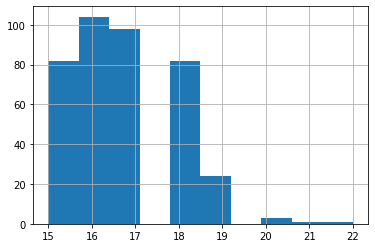

In [6]:
stud_math.age.hist()
stud_math.age.describe()

Как видим по этому признаку у нас могут быть выбросы. 

In [7]:
#Найдем первый квартиль
pd.DataFrame(stud_math.age.value_counts())
perc25=stud_math.age.quantile(0.25, interpolation='midpoint')
perc25

16.0

In [8]:
#Найдем третий квартиль
df=pd.DataFrame(stud_math)
perc75=stud_math.age.quantile(0.75, interpolation='midpoint')
perc75

18.0

In [9]:
#Найдем межквартильный размах
df=pd.DataFrame(stud_math)
df['age'].quantile(0.75, interpolation='midpoint')
IQR=df['age'].quantile(0.75)-df['age'].quantile(0.25)
IQR

2.0

In [10]:
#Посмотрим есть ли выбросы в столбце 'age'
V_1=df['age'].quantile(0.75, interpolation='midpoint')+1.5*IQR
V_1

21.0

У нас есть 2 выброса: 21 и 22 года, удалим их из нашего DF, чтобы не портили нам статистику

count    393.000000
mean      16.671756
std        1.231658
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       20.000000
Name: age, dtype: float64

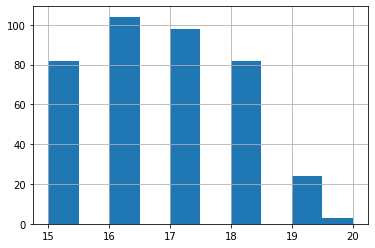

In [11]:
stud_math = stud_math.loc[stud_math.age<21]
stud_math.age.hist()
stud_math.age.describe()

**Выводы по столбцу 'age':**

Это числовой столбец. Пропусков нет, зато есть выбросы 21 и 22 года.
Теперь у нас изменились данные с учетом 2х выбросов в 21 и 22 года.
Самый популярный возраст 16 лет.
Средний возраст учеников 16,7 лет. Миниальный 15 лет, максимальный 20.

## 4. address

- тип адреса ученика ('U' - городской, 'R' - за городом).
Это строковый столбец

In [12]:
stud_math.loc[:, ['address']].info()
display(pd.DataFrame(stud_math.address.value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
address    376 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


,address
U,294
R,82


Как мы видим у нас есть 17 пустых значений.
Используя простой метод, заменим пустые значения модой признака. В данном случае это 'U'

In [15]:
stud_math.address = stud_math.address.apply(lambda x: 'U' if str(x).strip() == '' else 'U' if pd.isna(x)  else x )
display(pd.DataFrame(stud_math.address.value_counts()))
display(pd.DataFrame(stud_math.address.value_counts(normalize=True)))

,address
U,311
R,82


,address
U,0.791349
R,0.208651


**Выводы по столбцу 'address':** 

В этом строковом столбце было 17 попусков, которые мы заменили на самое частое значение (мода), в данном случае на 'U'.

Большинство адресов (79%) находятся в U (в рамках города)

## 5 famsize
- размер семьи('LE3' <= 3, 'GT3' >3). Это строковый столбец

In [16]:
stud_math.loc[:, ['famsize']].info()
display(pd.DataFrame(stud_math.famsize.value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
famsize    366 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


,famsize
GT3,259
LE3,107


Как мы видим у нас 27 пустых значений.
Используя простой метод, заменим пустые значения модой признака. В данном случае это 'GT3'

In [17]:
stud_math.famsize = stud_math.famsize.apply(lambda x: 'GT3' if str(x).strip() == '' else 'GT3' if pd.isna(x)  else x )
display(pd.DataFrame(stud_math.famsize.value_counts()))
display(pd.DataFrame(stud_math.famsize.value_counts(normalize=True)))

,famsize
GT3,286
LE3,107


,famsize
GT3,0.727735
LE3,0.272265


**Выводы по колонке 'famsize':** 

В нашем строковом столбце было 17 пропусков по размеру семьи.
Мы заменили их на самое частое значение (моду), в данном случае это GT3(размер семьи>3)
После обработки мы видим, что 73% всех семей имеют больше 3х членов семьи, а 27% - менее 3х.

## 6 Pstatus 
- статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно). Это строковый столбец.

In [18]:
stud_math.loc[:, ['Pstatus']].info()
display(pd.DataFrame(stud_math.Pstatus.value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
Pstatus    348 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


,Pstatus
T,312
A,36


Как мы видим у нас 45 пустых значений.
Используя простой метод, заменим пустые значения модой признака. В данном случае это 'T'

In [19]:
stud_math.Pstatus = stud_math.Pstatus.apply(lambda x: 'T' if str(x).strip() == '' else 'T' if pd.isna(x)  else x )
display(pd.DataFrame(stud_math.Pstatus.value_counts()))
display(pd.DataFrame(stud_math.Pstatus.value_counts(normalize=True)))

,Pstatus
T,357
A,36


,Pstatus
T,0.908397
A,0.091603


**Выводы по колонке 'Pstatus':** 

В нашем строковом столбце было 45 пустых значений.
Мы заменили их на самое частое значение (моду), в данном случае это T('T' - живут вместе 'A' - раздельно)
После обработки у нас в 91% всех семей родители живут вместе.

## 7 Medu 
- Образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее). Это числовой столбец.

In [20]:
display(pd.DataFrame(stud_math.Medu.value_counts()))
stud_math.loc[:, ['Medu']].info()

,Medu
4.0,131
2.0,102
3.0,96
1.0,58
0.0,3


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
Medu    390 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


Как мы видим у нас 3 пустых значения. Используя простой метод, заменим пустые значения модой признака. В данном случае это '4.0'

In [39]:
stud_math.Medu = stud_math.Medu.apply(lambda x: 4.0 if str(x).strip() == '' else 4.0 if pd.isna(x)  else x )
display(pd.DataFrame(stud_math.Medu.value_counts()))
display(pd.DataFrame(stud_math.Medu.value_counts(normalize=True)))

,Medu
4.0,134
2.0,102
3.0,96
1.0,58
0.0,3


,Medu
4.0,0.340967
2.0,0.259542
3.0,0.244275
1.0,0.147583
0.0,0.007634


Пропуски убрали, теперь посмотрим на его распределение:

count    393.000000
mean       2.763359
std        1.098459
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

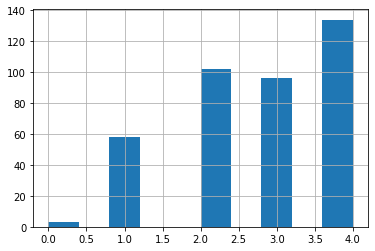

In [22]:
stud_math.Medu.hist()
stud_math.Medu.describe()

Как видим по этому признаку у нас могут быть выбросы. 

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


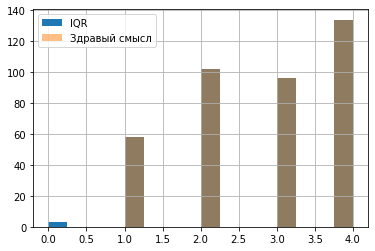

In [38]:
median = stud_math.Medu.median()
IQR = stud_math.Medu.quantile(0.75) - stud_math.Medu.quantile(0.25)
perc25 = stud_math.Medu.quantile(0.25)
perc75 = stud_math.Medu.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud_math.Medu.loc[stud_math.Medu.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 16
                                                                                              , range = (0.0, 4.0), 
                                                                                             label = 'IQR')
stud_math.Medu.loc[stud_math.Medu >= 1.0].hist(alpha = 0.5, bins = 16, range = (0.0, 4.0),
                                                        label = 'Здравый смысл')
plt.legend();

**Выводы по колонке 'Medu':**  

Это числовой столбец. Были пропуски, которые мы заменили на самое частое значение, в данном случае это '4.0'(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее). Выбросов нет.
34% матерей имеют высшее образование, меньше 1% не имеет образования совсем.

## 8 Fedu 
- образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее). Это числовой стлбец.

In [40]:
stud_math.loc[:, ['Fedu']].info()
display(pd.DataFrame(stud_math.Fedu.value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
Fedu    369 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


,Fedu
2.0,106
3.0,96
4.0,88
1.0,76
0.0,2
40.0,1


Как мы видим у нас 24 пустых значений. А также ощибка '40.0'. Используя простой метод, заменим пустые значения модой признака. В данном случае это '2.0'

In [44]:
stud_math.Fedu = stud_math.Fedu.apply(lambda x: 2.0 if str(x).strip() == '' else 2.0 if pd.isna(x)  else 2.0 if str(x).strip() == '40.0' else x)
display(pd.DataFrame(stud_math.Fedu.value_counts()))
display(pd.DataFrame(stud_math.Fedu.value_counts(normalize=True)))

,Fedu
2.0,131
3.0,96
4.0,88
1.0,76
0.0,2


,Fedu
2.0,0.333333
3.0,0.244275
4.0,0.223919
1.0,0.193384
0.0,0.005089


Пропуски и ошибки убрали, теперь посмотрим на его распределение:

count    393.000000
mean       2.488550
std        1.057286
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

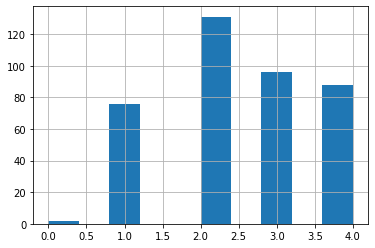

In [45]:
stud_math.Fedu.hist()
stud_math.Fedu.describe()

**Выводы по колонке 'Fedu':**

Это числовой столбец. В колонке была ошибка со значением 40.0, а также 24 пустых значения. Мы их заменили на моду '2.0'(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее).
Большинство (33%) отцов имеют высшее образование 5-9 классов, и меньше 1% - вообще не имеют образования.

## 9 Mjob 
- работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое). Это строковый столбец

In [46]:
stud_math.loc[:, ['Mjob']].info()
display(pd.DataFrame(stud_math.Mjob.value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
Mjob    374 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


,Mjob
other,132
services,97
at_home,58
teacher,55
health,32


Как мы видим у нас 19 пустых значений. Используя простой метод, заменим пустые значения модой признака. В данном случае это 'other'

In [47]:
stud_math.Mjob = stud_math.Mjob.apply(lambda x: 'other' if str(x).strip() == '' else 'other' if pd.isna(x)  else x )
display(pd.DataFrame(stud_math.Mjob.value_counts()))
display(pd.DataFrame(stud_math.Mjob.value_counts(normalize=True)))

,Mjob
other,151
services,97
at_home,58
teacher,55
health,32


,Mjob
other,0.384224
services,0.246819
at_home,0.147583
teacher,0.139949
health,0.081425


**Выводы по колонке 'Mjob':**

Это строковый столбец. В колонке есть 19 незаполненных значений. Мы заменили их на моду 'other'(другое). Большинство 38% матерей выбрали графу по работе "другое". Меньше всего (8%) работат в сфере здравоохранения.

## 10 Fjob
- работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое). Это строковый столбец.

In [48]:
stud_math.loc[:, ['Fjob']].info()
display(pd.DataFrame(stud_math.Fjob.value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
Fjob    357 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


,Fjob
other,196
services,101
teacher,29
at_home,16
health,15


Как мы видим у нас 36 пустых значений. Используя простой метод, заменим пустые значения модой признака. В данном случае это 'other'

In [49]:
stud_math.Fjob = stud_math.Fjob.apply(lambda x: 'other' if str(x).strip() == '' else 'other' if pd.isna(x)  else x )
display(pd.DataFrame(stud_math.Fjob.value_counts()))
display(pd.DataFrame(stud_math.Fjob.value_counts(normalize=True)))

,Fjob
other,232
services,101
teacher,29
at_home,16
health,15


,Fjob
other,0.590331
services,0.256997
teacher,0.073791
at_home,0.040712
health,0.038168


**Выводы по колонке 'Fjob':**

Это строковый столбец. В колонке есть 36 незаполненных значений. Мы заменили их на моду 'other'(другое). Большинство 59% отцов выбрали графу по работе "другое". Меньше всего (4%) работат в сфере здравоохранения.

## 11 reason
- причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое). Это строковый столбец.

In [50]:
stud_math.loc[:, ['reason']].info()
display(pd.DataFrame(stud_math.reason.value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
reason    376 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


,reason
course,136
home,104
reputation,103
other,33


Как мы видим у нас 17 пустых значений. Используя простой метод, заменим пустые значения модой признака. В данном случае это 'course'

In [51]:
stud_math.reason = stud_math.reason.apply(lambda x: 'course' if str(x).strip() == '' else 'course' if pd.isna(x)  else x )
display(pd.DataFrame(stud_math.reason.value_counts()))
display(pd.DataFrame(stud_math.reason.value_counts(normalize=True)))

,reason
course,153
home,104
reputation,103
other,33


,reason
course,0.389313
home,0.264631
reputation,0.262087
other,0.083969


**Выводы по колонке 'reason':**

Это строковый столбец. В колонке есть 17 незаполненных строк. мы заменили их на самое частое значение 'course' ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое). Больше всего (39%) семей выбрали школу из-за образовательной программы. А меньше всего (8%) по другим причинам.

## 12 guardian
- опекун ('mother' - мать, 'father' - отец, 'other' - другое). Это строковый столбец.

In [52]:
stud_math.loc[:, ['guardian']].info()
display(pd.DataFrame(stud_math.guardian.value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
guardian    363 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


,guardian
mother,249
father,86
other,28


Как мы видим у нас 30 пустых значений. Используя простой метод, заменим пустые значения модой признака. В данном случае это 'mother'

In [53]:
stud_math.guardian = stud_math.guardian.apply(lambda x: 'mother' if str(x).strip() == '' else 'mother' if pd.isna(x)  else x )
display(pd.DataFrame(stud_math.guardian.value_counts()))
display(pd.DataFrame(stud_math.guardian.value_counts(normalize=True)))

,guardian
mother,279
father,86
other,28


,guardian
mother,0.709924
father,0.218830
other,0.071247


**Выводы по колонке 'guardian':**

Это строковый столбецю В колонке есть 30 незаполненных строк, мы заменили их на самое часто значение, в нашем случае это 'mother' ('mother' - мать, 'father' - отец, 'other' - другое).  Больше всего (70%) опекунов -это матери. Меньше всего (7%) выбрали другой вариант.

## 13 traveltime
- время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.). Это числовой столбец.

In [54]:
stud_math.loc[:, ['traveltime']].info()
display(pd.DataFrame(stud_math.traveltime.value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
traveltime    365 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


,traveltime
1.0,240
2.0,96
3.0,22
4.0,7


Как мы видим у нас 28 пустых значений. Используя простой метод, заменим пустые значения модой признака. В данном случае это '1.0'

In [55]:
stud_math.traveltime = stud_math.traveltime.apply(lambda x: 1.0 if str(x).strip() == '' else 1.0 if pd.isna(x)  else x )
display(pd.DataFrame(stud_math.traveltime.value_counts()))
display(pd.DataFrame(stud_math.traveltime.value_counts(normalize=True)))

,traveltime
1.0,268
2.0,96
3.0,22
4.0,7


,traveltime
1.0,0.681934
2.0,0.244275
3.0,0.055980
4.0,0.017812


Пропуски убрали, теперь посмотрим на его распределение:

count    393.000000
mean       1.409669
std        0.679592
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

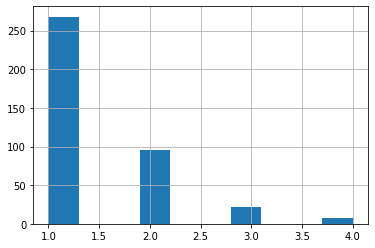

In [57]:
stud_math.traveltime.hist()
stud_math.traveltime.describe()

**Выводы по колонке 'traveltime':**

Это числовой столбец.В колонке есть 28 пустых значений, мы заменили их на самое часто значение '1.0' (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.). Выбросов нет. Больше всего (68%) семей тратят время на дорогу до школы не более 15 мин, и лишь 2% семей - больше часа.


## 14 studytime
- время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов). Это числовой столбец.

In [58]:
stud_math.loc[:, ['studytime']].info()
display(pd.DataFrame(stud_math.studytime.value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
studytime    386 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


,studytime
2.0,194
1.0,101
3.0,64
4.0,27


Как мы видим у нас 7 пустых значений. Используя простой метод, заменим пустые значения модой признака. В данном случае это '2.0'

In [59]:
stud_math.studytime = stud_math.studytime.apply(lambda x: 2.0 if str(x).strip() == '' else 2.0 if pd.isna(x)  else x )
display(pd.DataFrame(stud_math.studytime.value_counts()))
display(pd.DataFrame(stud_math.studytime.value_counts(normalize=True)))

,studytime
2.0,201
1.0,101
3.0,64
4.0,27


,studytime
2.0,0.511450
1.0,0.256997
3.0,0.162850
4.0,0.068702


Пропуски убрали, теперь посмотрим на его распределение.

count    393.000000
mean       2.043257
std        0.833398
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

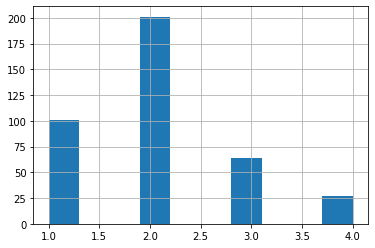

In [60]:
stud_math.studytime.hist()
stud_math.studytime.describe()

**Выводы по колонке 'studytime':**

Это числовой столбец. В колонке есть 7 незаполненных строк, мы заменили их на самое частое значение '2.0' (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов). Выбросов нет. Больше всего (51%) ученики тратят время на учебу помимо школы от 2-5 часов в день, а 7 % больше 10 часов в день.

## 15 failures
- количество внеучебных неудач (n, если 1<=n<3, иначе 4). Это числовой столбец.

In [61]:
stud_math.loc[:, ['failures']].info()
display(pd.DataFrame(stud_math.failures.value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
failures    371 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


,failures
0.0,293
1.0,49
2.0,16
3.0,13


В данном столбце у нас больше всего (293) у значения '0.0', которого не было даже в описании. Это значит, или тут какая-то ошибка, или люди целенаправленно ставили '0', чтобы показать что у них нет неудач. Также как и значения '4' тут также нет.
Поэтому данный столбец не несет никакой смысловой нагрузки, т.к. вся информация искажена, и мы его просто удалим.

In [62]:
stud_math.drop(['failures'], inplace = True, axis = 1)

**Выводы по колонке 'failures':**

Это числовой столбец. Мы решили его удалить,т.к. в данном столбце у нас больше всего (293) у значения '0.0', которого не было даже в описании. Это значит, или тут какая-то ошибка, или люди целенаправленно ставили '0', чтобы показать что у них нет неудач. Также как и значения '4' тут также нет. Поэтому данный столбец не несет никакой смысловой нагрузки, т.к. вся информация искажена.

## 16 schoolsup
- дополнительная образовательная поддержка (yes или no). Это строковый столбец.

In [63]:
stud_math.loc[:, ['schoolsup']].info()
display(pd.DataFrame(stud_math.schoolsup.value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
schoolsup    385 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


,schoolsup
no,334
yes,51


Как мы видим у нас 8 пустых значений. Используя простой метод, заменим пустые значения модой признака. В данном случае это 'no'

In [64]:
stud_math.schoolsup = stud_math.schoolsup.apply(lambda x: 'no' if str(x).strip() == '' else 'no' if pd.isna(x)  else x )
display(pd.DataFrame(stud_math.schoolsup.value_counts()))
display(pd.DataFrame(stud_math.schoolsup.value_counts(normalize=True)))

,schoolsup
no,342
yes,51


,schoolsup
no,0.870229
yes,0.129771


**Выводы по колонке 'fschoolsup':**

Это строковый столбец. В колонке есть 8 незаполненных строк, мы заменили их на самое частое значение 'no' . Больше всего (87%) учеников не пользуются дополнительной образовательной поддержкой.

## 17 famsup
- семейная образовательная поддержка (yes или no). Это строковый столбец.

In [65]:
stud_math.loc[:, ['famsup']].info()
display(pd.DataFrame(stud_math.famsup.value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
famsup    354 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


,famsup
yes,219
no,135


Как мы видим у нас 39 пустых значений. Используя простой метод, заменим пустые значения модой признака. В данном случае это 'yes'

In [66]:
stud_math.famsup = stud_math.famsup.apply(lambda x: 'yes' if str(x).strip() == '' else 'yes' if pd.isna(x)  else x )
display(pd.DataFrame(stud_math.famsup.value_counts()))
display(pd.DataFrame(stud_math.famsup.value_counts(normalize=True)))

,famsup
yes,258
no,135


,famsup
yes,0.656489
no,0.343511


**Выводы по колонке 'famsup':**

Это строковый столбец. В колонке есть 39 пустых значений, мы заменили их на самое частое значение 'yes' . Больше всего (66%) учеников пользуются семейной образовательной поддержкой.

## 18 paid
- дополнительные платные занятия по математике (yes или no). Это строковый столбец.

In [67]:
stud_math.loc[:, ['paid']].info()
display(pd.DataFrame(stud_math.paid.value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
paid    353 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


,paid
no,198
yes,155


Как мы видим у нас 40 пустых значений. Используя простой метод, заменим самым частым значением. В данном случае это 'no'

In [68]:
stud_math.paid = stud_math.paid.apply(lambda x: 'no' if str(x).strip() == '' else 'no' if pd.isna(x)  else x )
display(pd.DataFrame(stud_math.paid.value_counts()))
display(pd.DataFrame(stud_math.paid.value_counts(normalize=True)))

,paid
no,238
yes,155


,paid
no,0.605598
yes,0.394402


**Выводы по колонке 'paid':**

Это строковый столбец. В колонке есть 40 незаполненных строк, мы заменили их на самое частое значение 'no' . Большинство 60% семей не платят за доп.занятия по математике.

## 19 activities
- дополнительные внеучебные занятия (yes или no). Это строковый столбец.

In [69]:
stud_math.loc[:, ['activities']].info()
display(pd.DataFrame(stud_math.activities.value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
activities    379 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


,activities
yes,195
no,184


Как мы видим у нас 14 пустых значений. Используя простой метод, заменим самым частым значением. В данном случае это 'yes'

In [70]:
stud_math.activities = stud_math.activities.apply(lambda x: 'yes' if str(x).strip() == '' else 'yes' if pd.isna(x)  else x )
display(pd.DataFrame(stud_math.activities.value_counts()))
display(pd.DataFrame(stud_math.activities.value_counts(normalize=True)))

,activities
yes,209
no,184


,activities
yes,0.531807
no,0.468193


**Выводы по колонке 'activities':**

Это строковый столбец. В колонке есть 14 незаполненных значения, мы заменили их на самое частое значение 'yes', хотя они практически равны, но все же значения 'yes' больше . Семьи распределились практически поровну на тех кто посещят доп.внеучебные занятия (53%) и кто не посещает(47%).

## 20 nursery
- посещал детский сад (yes или no). Это строковый стобец.

In [71]:
stud_math.loc[:, ['nursery']].info()
display(pd.DataFrame(stud_math.nursery.value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
nursery    377 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


,nursery
yes,300
no,77


Как мы видим у нас 16 пустых значений. Используя простой метод, заменим самым частым значением. В данном случае это 'yes'

In [72]:
stud_math.nursery = stud_math.nursery.apply(lambda x: 'yes' if str(x).strip() == '' else 'yes' if pd.isna(x)  else x )
display(pd.DataFrame(stud_math.nursery.value_counts()))
display(pd.DataFrame(stud_math.nursery.value_counts(normalize=True)))

,nursery
yes,316
no,77


,nursery
yes,0.804071
no,0.195929


**Выводы по колонке 'nursery':**

Это строковый столбец. В колонке есть 16 незаполненных значений, мы заменили их на самое частое значение 'yes' . 80% школьников посещали детский сад.

## 21 higher
- хочет получить высшее образование (yes или no). Это строковый столбец.

In [73]:
stud_math.loc[:, ['higher']].info()
display(pd.DataFrame(stud_math.higher.value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
higher    374 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


,higher
yes,356
no,18



Как мы видим у нас 19 пустых значений. Используя простой метод, заменим самым частым значением. В данном случае это 'yes'

In [74]:
stud_math.higher = stud_math.higher.apply(lambda x: 'yes' if str(x).strip() == '' else 'yes' if pd.isna(x)  else x )
display(pd.DataFrame(stud_math.higher.value_counts()))
display(pd.DataFrame(stud_math.higher.value_counts(normalize=True)))

,higher
yes,375
no,18


,higher
yes,0.954198
no,0.045802


**Выводы по колонке 'higher':**

Это строковый столбец. В колонке есть 18 незаполненных значений, мы заменили их на самое частое значение 'yes'. 95% школьников хотят получить высшее образование.

## 22 internet
- наличие интернета дома (yes или no). Это строковый столбец

In [75]:
stud_math.loc[:, ['internet']].info()
display(pd.DataFrame(stud_math.internet.value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
internet    359 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


,internet
yes,304
no,55


Как мы видим у нас 34 пустых значений. Используя простой метод, заменим самым частым значением. В данном случае это 'yes'

In [76]:
stud_math.internet = stud_math.internet.apply(lambda x: 'yes' if str(x).strip() == '' else 'yes' if pd.isna(x)  else x )
display(pd.DataFrame(stud_math.internet.value_counts()))
display(pd.DataFrame(stud_math.internet.value_counts(normalize=True)))

,internet
yes,338
no,55


,internet
yes,0.860051
no,0.139949


**Выводы по колонке 'internet':**

Это строковый столбец. В колонке есть 34 незаполненных значений, мы заменили их на самое частое значение 'yes'. У 86% школьников дома есть интернет.

## 23 romantic
- в романтических отношениях (yes или no). Это строковый столбец.

In [77]:
stud_math.loc[:, ['romantic']].info()
display(pd.DataFrame(stud_math.romantic.value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
romantic    362 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


,romantic
no,239
yes,123


Как мы видим у нас 31 пустое значений. Используя простой метод, заменим самым частым значением. В данном случае это 'no'.

In [78]:
stud_math.romantic = stud_math.romantic.apply(lambda x: 'no' if str(x).strip() == '' else 'no' if pd.isna(x)  else x )
display(pd.DataFrame(stud_math.romantic.value_counts()))
display(pd.DataFrame(stud_math.romantic.value_counts(normalize=True)))

,romantic
no,270
yes,123


,romantic
no,0.687023
yes,0.312977


**Выводы по колонке 'romantic':**

Это строковый столбец. В колонке есть 31 незаполненное значение, мы заменили их на самое частое значение 'no'. Большинство (69%) школьников не состоят в романтических отношениях.

## 24 famrel
- семейные отношения (от 1 - очень плохо до 5 - очень хорошо). Это числовой столбец.

In [79]:
stud_math.loc[:, ['famrel']].info()
display(pd.DataFrame(stud_math.famrel.value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
famrel    366 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


,famrel
4.0,182
5.0,97
3.0,62
2.0,17
1.0,7
-1.0,1


Как мы видим у нас 27 пустых значений. А также одна ошибка '-1.0'. Используя простой метод, заменим самым частым значением. В данном случае это '4.0'.

In [80]:
stud_math.famrel = stud_math.famrel.apply(lambda x: 4.0 if str(x).strip() == '' else 4.0 if pd.isna(x)  else 4.0 if str(x).strip() == '-1.0' else x)
display(pd.DataFrame(stud_math.famrel.value_counts()))
display(pd.DataFrame(stud_math.famrel.value_counts(normalize=True)))

,famrel
4.0,210
5.0,97
3.0,62
2.0,17
1.0,7


,famrel
4.0,0.534351
5.0,0.246819
3.0,0.157761
2.0,0.043257
1.0,0.017812


Пропуски и ошибки убрали, теперь посмотрим на его распределение.

count    393.000000
mean       3.949109
std        0.858603
min        1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: famrel, dtype: float64

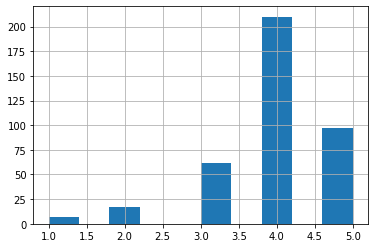

In [81]:
stud_math.famrel.hist()
stud_math.famrel.describe()

**Выводы по колонке 'famrel':**

Это числовой столбец.В колонке есть 27 пустых значений и одна ошибка, мы заменили их на самое частое значение '4.0' (от 1 - очень плохо до 5 - очень хорошо). Выбросов нет. Больше всего (53%) семей имеют по шкале отношений '4', что значит что отношения хорошие, у 2% - очень плохие.

## 25 freetime
- свободное время после школы (от 1 - очень мало до 5 - очень мого). Это числовой столбец.

In [82]:
stud_math.loc[:, ['freetime']].info()
display(pd.DataFrame(stud_math.freetime.value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
freetime    382 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


,freetime
3.0,153
4.0,111
2.0,63
5.0,37
1.0,18


Как мы видим у нас 11 пустых значений.  Используя простой метод, заменим самым частым значением. В данном случае это '3.0'.

In [83]:
stud_math.freetime = stud_math.freetime.apply(lambda x: 3.0 if str(x).strip() == '' else 3.0 if pd.isna(x)  else x )
display(pd.DataFrame(stud_math.freetime.value_counts()))
display(pd.DataFrame(stud_math.freetime.value_counts(normalize=True)))

,freetime
3.0,164
4.0,111
2.0,63
5.0,37
1.0,18


,freetime
3.0,0.417303
4.0,0.282443
2.0,0.160305
5.0,0.094148
1.0,0.045802


Пропуски убрали, теперь посмотрим на его распределение.

count    393.000000
mean       3.218830
std        0.978312
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

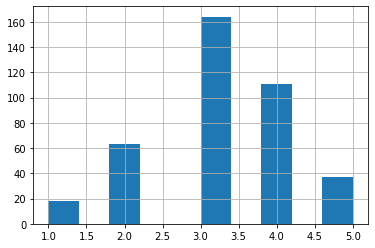

In [84]:
stud_math.freetime.hist()
stud_math.freetime.describe()

**Выводы по колонке 'freetime':**

Это числовой столбец. В колонке есть 11 пустых значений, мы заменили их на самое частое значение '3.0'. Выбросов нет. Большинство (42%) имеют свободное время '3' по шкале от 1 до 5. Только 9% имеют очень много свободого времени после школы, а 5% - совсем мало.

## 26 goout
- проведение времени с друзьями (от 1 - очень мало до 5 - очень много). Это числовой столбец.

In [85]:
stud_math.loc[:, ['goout']].info()
display(pd.DataFrame(stud_math.goout.value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
goout    385 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


,goout
3.0,126
2.0,101
4.0,84
5.0,51
1.0,23


Как мы видим у нас 8 пустых значений. Используя простой метод, заменим самым частым значением. В данном случае это '3.0'.

In [86]:
stud_math.goout = stud_math.goout.apply(lambda x: 3.0 if str(x).strip() == '' else 3.0 if pd.isna(x)  else x )
display(pd.DataFrame(stud_math.goout.value_counts()))
display(pd.DataFrame(stud_math.goout.value_counts(normalize=True)))

,goout
3.0,134
2.0,101
4.0,84
5.0,51
1.0,23


,goout
3.0,0.340967
2.0,0.256997
4.0,0.213740
5.0,0.129771
1.0,0.058524


Пропуски убрали, теперь посмотрим на его распределение.

count    393.000000
mean       3.099237
std        1.103253
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

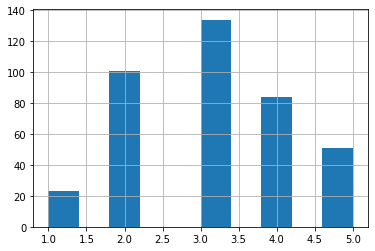

In [87]:
stud_math.goout.hist()
stud_math.goout.describe()

**Выводы по колонке 'goout':**

Это числовой столбец. В колонке есть 8 пустых значений, мы заменили их на самое частое значение '3.0'. Выбросов нет. Большинство (34%) проводят время с друзьями '3' по шкале от 1 до 5. 13% проводят очень много времени с друзьями, а 6% - совсем мало.

## 27 health
- текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо). Это числовой столбец.

In [88]:
stud_math.loc[:, ['health']].info()
display(pd.DataFrame(stud_math.health.value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
health    378 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


,health
5.0,138
3.0,88
4.0,63
1.0,46
2.0,43


Как мы видим у нас 15 пустых значений. Используя простой метод, заменим самым частым значением. В данном случае это '5.0'.

In [89]:
stud_math.health = stud_math.health.apply(lambda x: 5.0 if str(x).strip() == '' else 5.0 if pd.isna(x)  else x )
display(pd.DataFrame(stud_math.health.value_counts()))
display(pd.DataFrame(stud_math.health.value_counts(normalize=True)))

,health
5.0,153
3.0,88
4.0,63
1.0,46
2.0,43


,health
5.0,0.389313
3.0,0.223919
4.0,0.160305
1.0,0.117048
2.0,0.109415


Пропуски убрали, теперь посмотрим на его распределение.

count    393.000000
mean       3.595420
std        1.394845
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

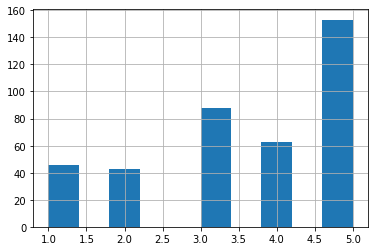

In [90]:
stud_math.health.hist()
stud_math.health.describe()

**Выводы по колонке 'health':**

Это числовой столбец. В колонке есть 15 пустых значений, мы заменили их на самое частое значение '5.0'. Выбросов нет. Большинство  учеников (39%) имеют очень хорошее здоровье. А 12% - очень плохое.

## 28 absences
- количество пропущенных занятий. Это числовой столбец.

In [91]:
stud_math.loc[:, ['absences']].info()
display(pd.DataFrame(stud_math.absences.value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
absences    381 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,7
16.0,6


Как мы видим у нас 12 пустых значений. Используя простой метод, заменим самым частым значением. В данном случае это '0.0'.

In [104]:
stud_math.absences = stud_math.absences.apply(lambda x: 0.0 if str(x).strip() == '' else 0.0 if pd.isna(x)  else x )
display(pd.DataFrame(stud_math.absences.value_counts()))

,absences
0.0,123
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,7
16.0,6


Пропуски убрали, теперь посмотрим на его распределение.

count    393.000000
mean       7.045802
std       23.192582
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

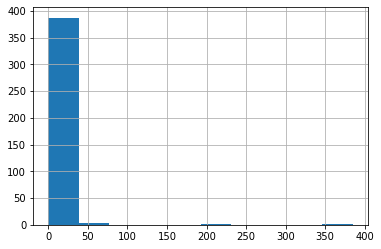

In [94]:
stud_math.absences.hist()
stud_math.absences.describe()

Видим, что основное распределение лежит между 0 и 75 пропущенных занятий и есть потенциальные выбросы свыше 200 (об этом нам говорит здравый смысл).
Самый простой способ отфильтровать выбросы — воспользоваться формулой интерквартильного расстояния (межквартильного размаха). 
Выбросом считаются такие значения, которые лежат вне рамок.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


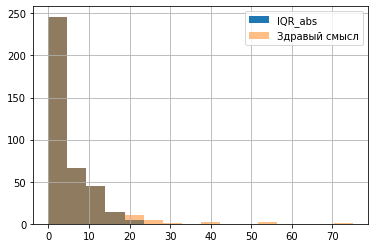

In [102]:
median = stud_math.absences.median()
IQR_abs = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25_abs = stud_math.absences.quantile(0.25)
perc75_abs = stud_math.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25_abs), '75-й перцентиль: {},'.format(perc75_abs)
      , "IQR: {}, ".format(IQR_abs),"Границы выбросов: [{f}, {l}].".format(f=perc25_abs - 1.5*IQR_abs, l=perc75_abs + 1.5*IQR_abs))
stud_math.absences.loc[stud_math.absences.between(perc25_abs - 1.5*IQR, perc75_abs + 1.5*IQR_abs)].hist(bins = 16
                                                                                              , range = (0, 75), 
                                                                                             label = 'IQR_abs')
stud_math.absences.loc[stud_math.absences <= 75].hist(alpha = 0.5, bins = 16, range = (0, 75),
                                                        label = 'Здравый смысл')
plt.legend();

Устраним все выбросы, которые больше 75

In [105]:
stud_math = stud_math.loc[stud_math.absences <= 75]

In [106]:
display(pd.DataFrame(stud_math.absences.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (stud_math.absences.value_counts()>10).sum())
print("Уникальных значений:", stud_math.absences.nunique())
stud_math.loc[:, ['absences']].info()

,absences
0.0,123
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
14.0,12
12.0,12
3.0,7
16.0,6


Значений, встретившихся в столбце более 10 раз: 8
Уникальных значений: 34
<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 394
Data columns (total 1 columns):
absences    391 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


**Выводы по колонке 'absences'.**

Это числовой столбец. В колонке есть 12 пустых значений, мы заменили их на самое частое значение '0.0' (нет пропущенных занятий). Мы нашли и удалили два выброса (212 и 385). Значений, встретившихся в столбце более 10 раз всего 8. Большинство (123 ученика) не пропустили ни одного занятия.

In [ ]:
studytime, granular

## 29 score
- баллы по госэкзамену по математике. Это числовой столбец.

In [107]:
stud_math.loc[:, ['score']].info()
display(pd.DataFrame(stud_math.score.value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 394
Data columns (total 1 columns):
score    385 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
60.0,31
40.0,30
70.0,27
45.0,26
80.0,16


Как мы видим у нас 16 пустых значений. Используя простой метод, заменим самым частым значением. В данном случае это '50.0'.

In [108]:
stud_math.score = stud_math.score.apply(lambda x: 50.0 if str(x).strip() == '' else 50.0 if pd.isna(x)  else x )
display(pd.DataFrame(stud_math.score.value_counts()))

,score
50.0,60
55.0,46
0.0,37
75.0,33
65.0,31
60.0,31
40.0,30
70.0,27
45.0,26
80.0,16


Пропуски убрали, теперь посмотрим на его распределение.

count    391.000000
mean      52.237852
std       22.773516
min        0.000000
25%       42.500000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Значений, встретившихся в столбце более 10 раз: 12
Уникальных значений: 18


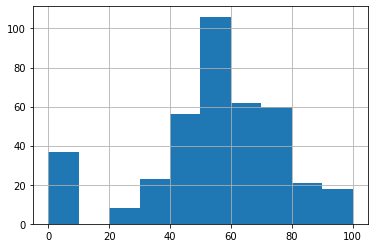

In [111]:
stud_math.score.hist()
display(stud_math.score.describe())
print("Значений, встретившихся в столбце более 10 раз:", (stud_math.score.value_counts()>10).sum())
print("Уникальных значений:", stud_math.score.nunique())

**Выводы по колонке 'score'.**

Это числовой столбец. В колонке есть 16 пустых значений, мы заменили их на самое частое значение '50.0'. Выбросов нет. Распределение нормальное. Значений, встретившихся в столбце более 10 раз всего 12. Большинство (60 учеников) имею оценку '50.0', что является практически средним значением. Также есть 37 учеников, не набравших ни одного была (0.0), это говорит скорее об ошибке, чем о том, что они не смогли ничего решить. Но возможно они что-то нарушили и их результаты аннулировали. Но мы  не станем убирать эти значения.

## Выясним, какие столбцы коррелируют со 'score'
- Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. Корреляции рассмотрим только для числовых столбцов. Для быстрого построения графиков зависимости переменных можно воспользоваться функцией pairplot из модуля seaborn:

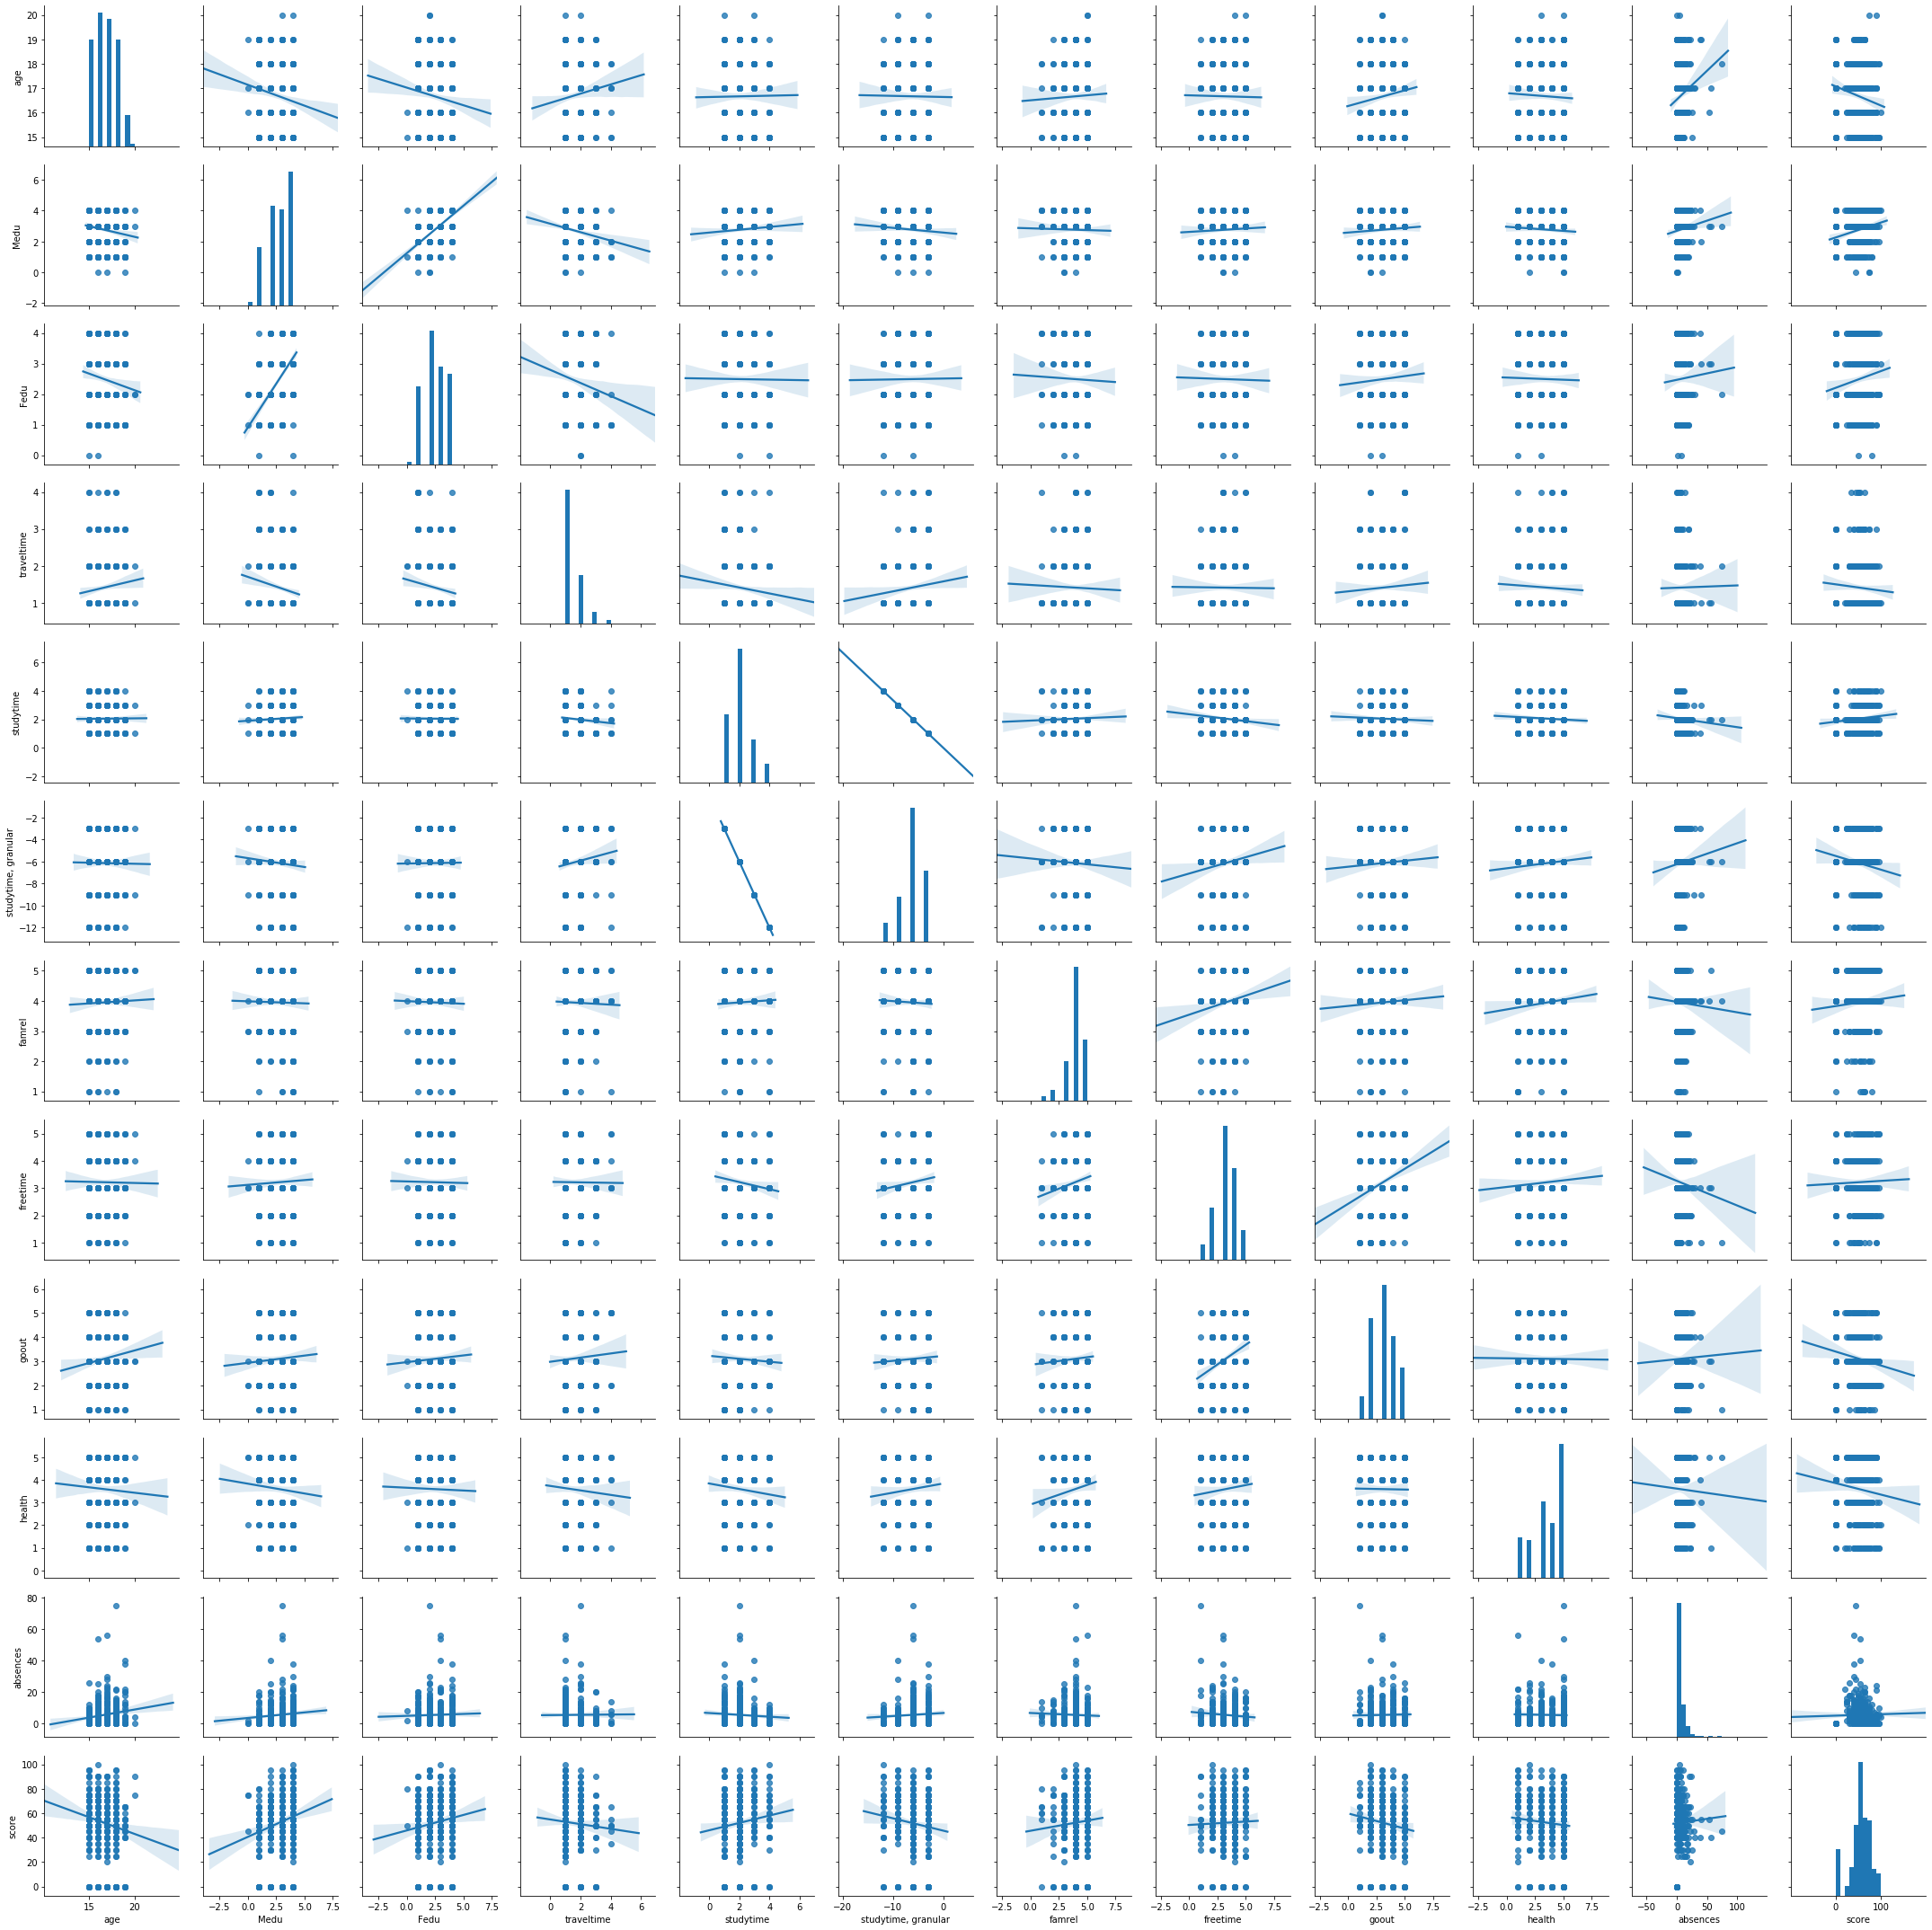

In [116]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline
sns.pairplot(stud_math, kind = 'reg')

Используем для наглядности матрицу корреляций:

In [117]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.153451,-0.124718,0.104560,0.009275,-0.009281,0.028586,-0.010429,0.115145,-0.041905,0.154310,-0.146115
Medu,-0.153451,1.000000,0.592934,-0.169624,0.069631,-0.070143,-0.017541,0.039506,0.059995,-0.067992,0.096272,0.201007
Fedu,-0.124718,0.592934,1.000000,-0.137418,-0.006675,0.006790,-0.021890,-0.012474,0.053820,-0.018731,0.031960,0.117712
traveltime,0.104560,-0.169624,-0.137418,1.000000,-0.099185,0.100351,-0.022847,-0.006126,0.053179,-0.048344,0.007343,-0.057114
studytime,0.009275,0.069631,-0.006675,-0.099185,1.000000,-1.000000,0.035332,-0.112034,-0.046699,-0.072730,-0.060570,0.110763
"studytime, granular",-0.009281,-0.070143,0.006790,0.100351,-1.000000,1.000000,-0.035871,0.113683,0.047128,0.073314,0.060905,-0.112301
famrel,0.028586,-0.017541,-0.021890,-0.022847,0.035332,-0.035871,1.000000,0.144841,0.049008,0.106000,-0.032732,0.062336
freetime,-0.010429,0.039506,-0.012474,-0.006126,-0.112034,0.113683,0.144841,1.000000,0.289781,0.069387,-0.074450,0.023867
goout,0.115145,0.059995,0.053820,0.053179,-0.046699,0.047128,0.049008,0.289781,1.000000,-0.008064,0.019107,-0.119706
health,-0.041905,-0.067992,-0.018731,-0.048344,-0.072730,0.073314,0.106000,0.069387,-0.008064,1.000000,-0.022007,-0.082669


**Выводы по матрице:**

Существуют обычные стандарты матрицы корреляции:

+1     - это строгая прямая связь
+0.50  - это слабая прямая связь
 0.00  - нет связи
-0.50  - это слабая обратная связь
-1.00  - это строгая обратная связь

По нашей матрице получилось, что значения больше 0.1 ии меньше -0.1 будут являться значительной корреляцией, а значение 0.2 -сильной:

**Положительная:**

Medu      0.20 - сильная корреляция
Fedu      0.12 - значительная корреляция
studytime 0.11 - значительная корреляция
famrel    0.06 - практически нет связи
freetime  0.02 - практически нет связи
absences  0.03 - практически нет связи

**Отрицательная:**

age                 -0.15 - значительная корреляция
traveltime          -0.06 - практически нет связи
studytime, granular -0.11 - значительная корреляция
goout               -0.12 - значительная корреляция
health              -0.08 - практически нет связи

**Итого:**

Мы обнаружили новую переменную, по которой не делали разбор "studytime, granular". 
Заменим название, на более удобное, состоящее из одного слова "granular".

In [121]:
stud_math=stud_math.rename(columns={'studytime, granular': 'granular'})
stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'granular',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

Проанализируем данный столбец:

## 30 granular
- Это числовой столбец, тесно связанный с 'studytime'

In [124]:
stud_math.loc[:, ['granular']].info()
display(pd.DataFrame(stud_math.granular.value_counts()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 394
Data columns (total 1 columns):
granular    384 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


,granular
-6.0,192
-3.0,101
-9.0,64
-12.0,27


Как мы видим у нас 7 пустых значений. Используя простой метод, заменим самым частым значением. В данном случае это '-6.0'.

In [125]:
stud_math.granular = stud_math.granular.apply(lambda x: -6.0 if str(x).strip() == '' else -6.0 if pd.isna(x)  else x )
display(pd.DataFrame(stud_math.granular.value_counts()))

,granular
-6.0,199
-3.0,101
-9.0,64
-12.0,27


Пропуски убрали, теперь посмотрим на его распределение.

count    391.000000
mean      -6.130435
std        2.506580
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: granular, dtype: float64

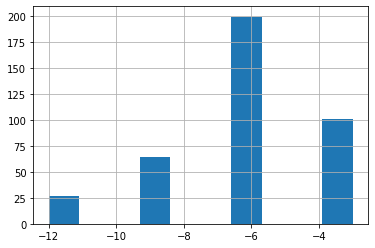

In [126]:
stud_math.granular.hist()
display(stud_math.granular.describe())

**Выводы по столбцу 'granular':**

Это числовой столбец. В колонке есть 7 пустых значений, мы заменили их на самое частое значение '-6.0'. Выбросов нет. Распределение нормальное. Т.к. по матрице корреляций у них строгая обратная связь (-1.0), то это значит что количество времени потряченное на учебу напрямую влияет на 'granular'.

**Посмотрим распределение по 'studytime' (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов) :**

mean       2.043257
std        0.833398
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.00000

**Посмотрим распределение по 'granular':**

mean      -6.130435
std        2.506580
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000

Из этих данных видно, что если ученик тратит менее 2х часов на учебу, то показатель 'granular' все больше уходит в минус (в данном случае это -12) 

**Выводы по матрице:**

Для дальнейшей работы оставим:

Medu, Fedu, studytime, age, granular, goout.


**Проанализируем номинативные переменные:**

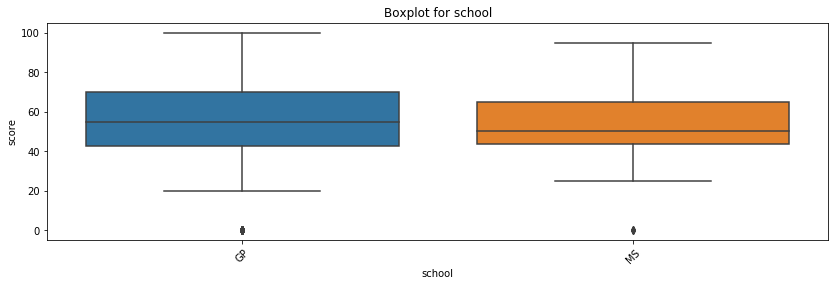

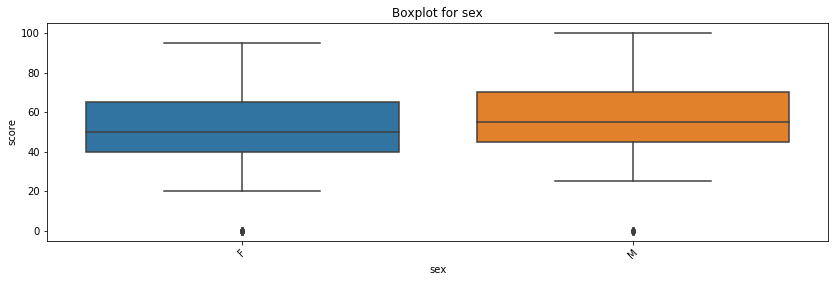

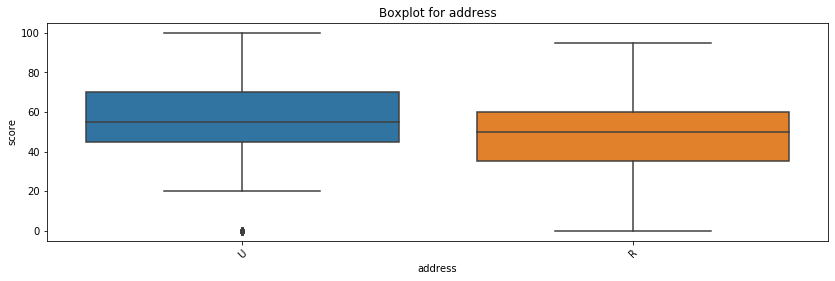

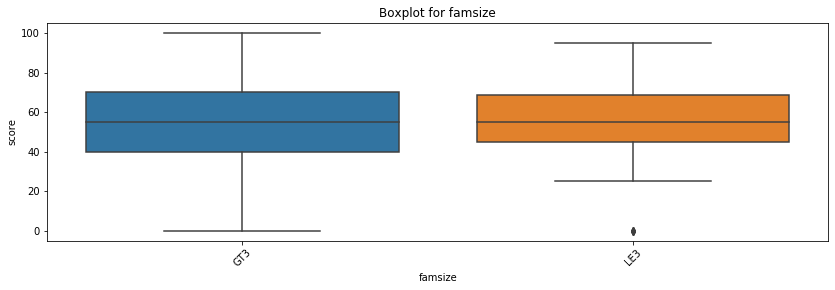

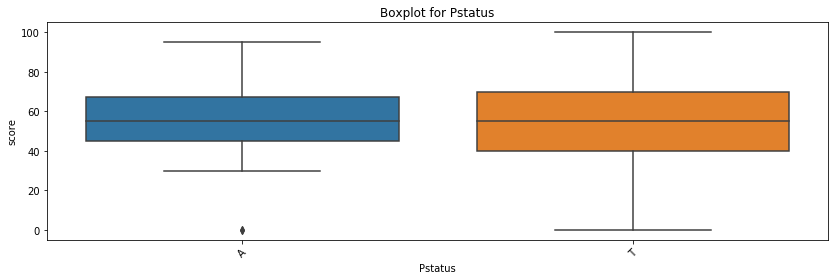

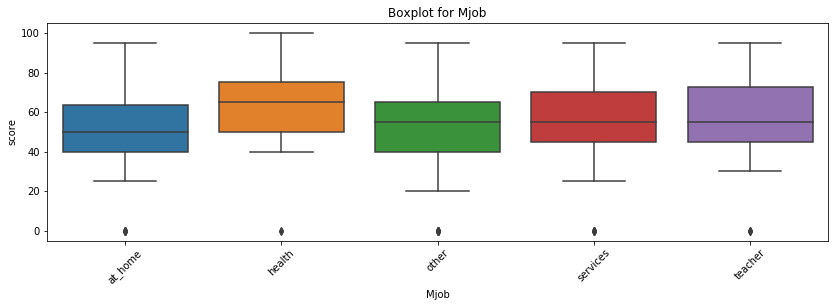

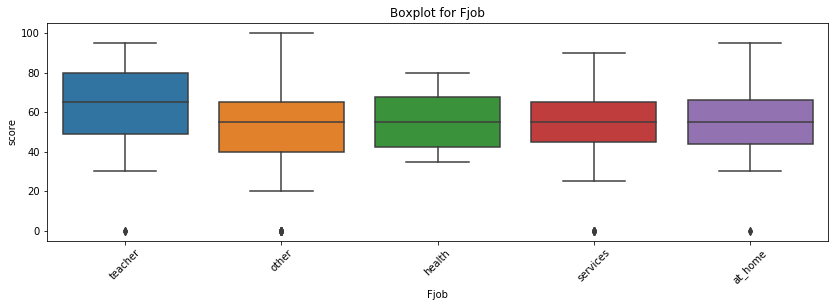

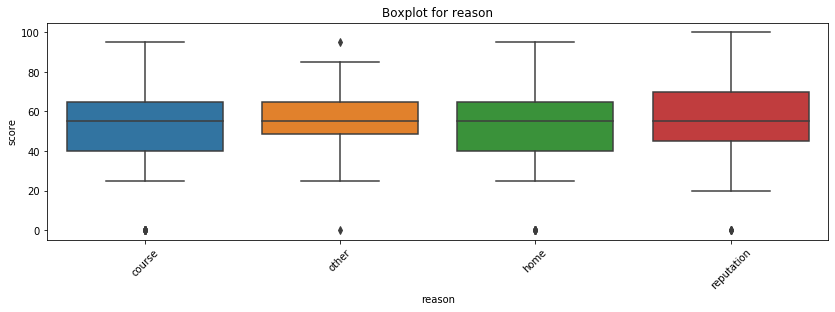

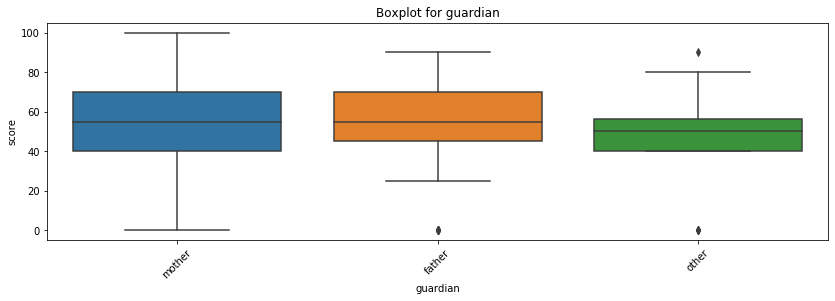

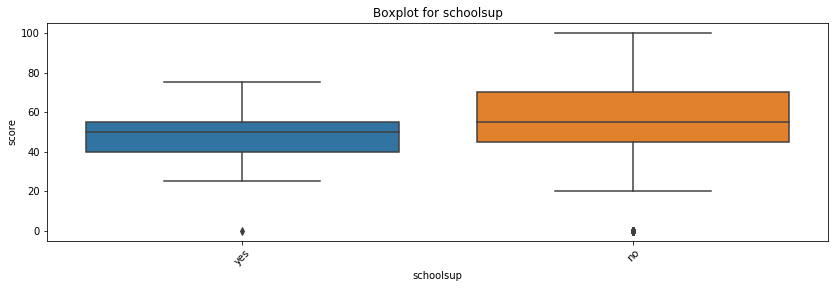

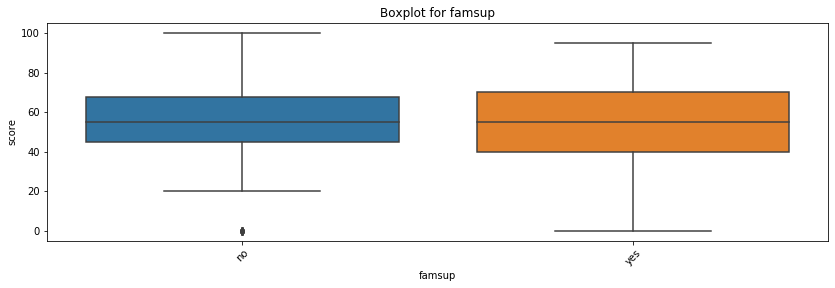

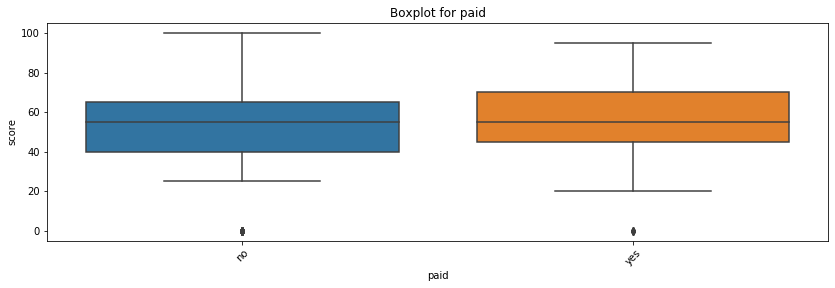

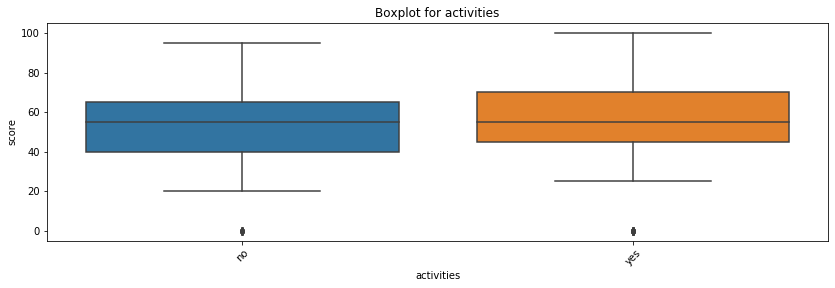

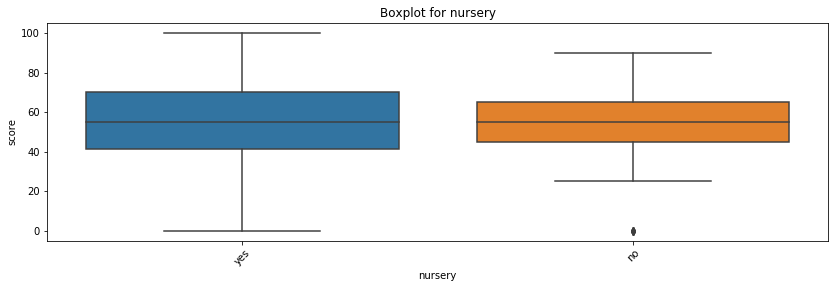

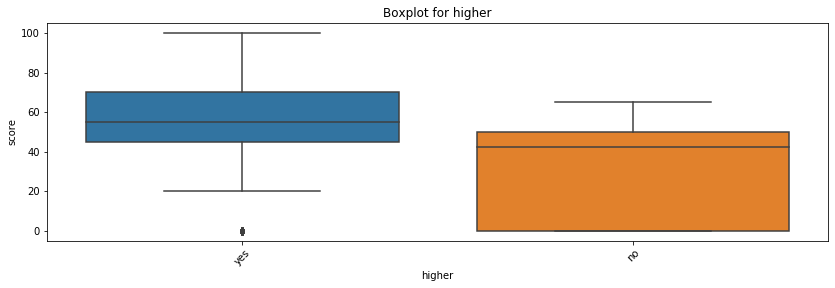

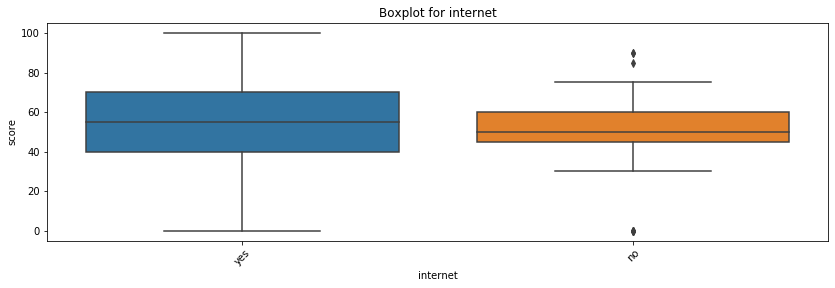

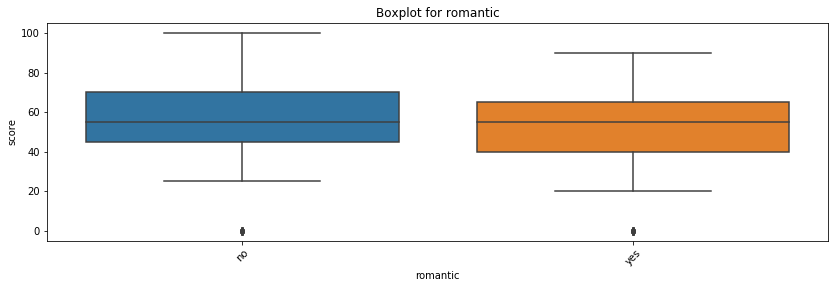

In [119]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. 
Проверим нулевую гипотезу о том, что распределения баллов по госэкзамену по математике по различным параметрам неразличимы:

In [120]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: 
Medu, Fedu, studytime, age, granular, goout, sex, address, Mjob, higher, romantic

In [122]:
stud_math_for_model = stud_math.loc[:, ['Medu', 'Fedu', 'studytime', 'age', 'granular', 'goout', 'sex', 'address', 'Mjob', 'higher', 'romantic']]
stud_math_for_model.head()

,Medu,Fedu,studytime,age,granular,goout,sex,address,Mjob,higher,romantic
0,4.0,4.0,2.0,18,-6.0,4.0,F,U,at_home,yes,no
1,1.0,1.0,2.0,17,-6.0,3.0,F,U,at_home,yes,no
2,1.0,1.0,2.0,15,-6.0,2.0,F,U,at_home,yes,no
3,4.0,2.0,3.0,15,-9.0,2.0,F,U,health,yes,yes
4,3.0,3.0,2.0,16,-6.0,2.0,F,U,other,yes,no


**ВЫВОДЫ:**

Итак, в результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике были получены следующие выводы:

**1.** В данных достаточно много пустых значений:

Столбец 'age':
Это числовой столбец. Пропусков нет, зато есть выбросы 21 и 22 года. Теперь у нас изменились данные с учетом 2х выбросов в 21 и 22 года. Самый популярный возраст 16 лет. Средний возраст учеников 16,7 лет. Миниальный 15 лет, максимальный 20.


Столбец 'address': 
В этом строковом столбце было 17 попусков, которые мы заменили на самое частое значение (мода), в данном случае на 'U'.
Большинство адресов (79%) находятся в U (в рамках города)


Столбец 'famsize': 
В нашем строковом столбце было 17 пропусков по размеру семьи. Мы заменили их на самое частое значение (моду), в данном случае это GT3(размер семьи>3) После обработки мы видим, что 73% всех семей имеют больше 3х членов семьи, а 27% - менее 3х.


Столбец 'Pstatus': 
В нашем строковом столбце было 45 пустых значений. Мы заменили их на самое частое значение (моду), в данном случае это T('T' - живут вместе 'A' - раздельно) После обработки у нас в 91% всех семей родители живут вместе.


Столбец 'Medu': 
Это числовой столбец. Были пропуски, которые мы заменили на самое частое значение, в данном случае это '4.0'(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее). Выбросов нет. 34% матерей имеют высшее образование, меньше 1% не имеет образования совсем.


Столбец 'Fedu':
Это числовой столбец. В колонке была ошибка со значением 40.0, а также 24 пустых значения. Мы их заменили на моду '2.0'(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее). Большинство (33%) отцов имеют высшее образование 5-9 классов, и меньше 1% - вообще не имеют образования.

Столбец 'Mjob':
Это строковый столбец. В колонке есть 19 незаполненных значений. Мы заменили их на моду 'other'(другое). Большинство 38% матерей выбрали графу по работе "другое". Меньше всего (8%) работат в сфере здравоохранения.

Столбец 'Fjob':
Это строковый столбец. В колонке есть 36 незаполненных значений. Мы заменили их на моду 'other'(другое). Большинство 59% отцов выбрали графу по работе "другое". Меньше всего (4%) работат в сфере здравоохранения.


Столбец 'reason':
Это строковый столбец. В колонке есть 17 незаполненных строк. мы заменили их на самое частое значение 'course' ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое). Больше всего (39%) семей выбрали школу из-за образовательной программы. А меньше всего (8%) по другим причинам.


Столбец 'guardian':
Это строковый столбецю В колонке есть 30 незаполненных строк, мы заменили их на самое часто значение, в нашем случае это 'mother' ('mother' - мать, 'father' - отец, 'other' - другое). Больше всего (70%) опекунов -это матери. Меньше всего (7%) выбрали другой вариант.

Столбец 'traveltime':
Это числовой столбец.В колонке есть 28 пустых значений, мы заменили их на самое частое значение '1.0' (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.). Выбросов нет. Больше всего (68%) семей тратят время на дорогу до школы не более 15 мин, и лишь 2% семей - больше часа.

Столбец 'studytime':
Это числовой столбец. В колонке есть 7 незаполненных строк, мы заменили их на самое частое значение '2.0' (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов). Выбросов нет. Больше всего (51%) ученики тратят время на учебу помимо школы от 2-5 часов в день, а 7 % больше 10 часов в день.


Столбец 'failures':
Это числовой столбец. Мы решили его удалить,т.к. в данном столбце у нас больше всего (293) у значения '0.0', которого не было даже в описании. Это значит, или тут какая-то ошибка, или люди целенаправленно ставили '0', чтобы показать что у них нет неудач. Также как и значения '4' тут также нет. Поэтому данный столбец не несет никакой смысловой нагрузки, т.к. вся информация искажена.

Столбец 'fschoolsup':
Это строковый столбец. В колонке есть 8 незаполненных строк, мы заменили их на самое частое значение 'no' . Больше всего (87%) учеников не пользуются дополнительной образовательной поддержкой.

Столбец 'famsup':
Это строковый столбец. В колонке есть 39 пустых значений, мы заменили их на самое частое значение 'yes' . Больше всего (66%) учеников пользуются семейной образовательной поддержкой.


Столбец 'paid':
Это строковый столбец. В колонке есть 40 незаполненных строк, мы заменили их на самое частое значение 'no' . Большинство 60% семей не платят за доп.занятия по математике.

Столбец 'activities':
Это строковый столбец. В колонке есть 14 незаполненных значения, мы заменили их на самое частое значение 'yes', хотя они практически равны, но все же значения 'yes' больше . Семьи распределились практически поровну на тех кто посещят доп.внеучебные занятия (53%) и кто не посещает(47%).


Столбец 'nursery':
Это строковый столбец. В колонке есть 16 незаполненных значений, мы заменили их на самое частое значение 'yes' . 80% школьников посещали детский сад.

Столбец 'higher':
Это строковый столбец. В колонке есть 18 незаполненных значений, мы заменили их на самое частое значение 'yes'. 95% школьников хотят получить высшее образование.

Столбец 'internet':
Это строковый столбец. В колонке есть 34 незаполненных значений, мы заменили их на самое частое значение 'yes'. У 86% школьников дома есть интернет.

Столбец 'romantic':
Это строковый столбец. В колонке есть 31 незаполненное значение, мы заменили их на самое частое значение 'no'. Большинство (69%) школьников не состоят в романтических отношениях.

Столбец 'famrel':
Это числовой столбец.В колонке есть 27 пустых значений и одна ошибка, мы заменили их на самое частое значение '4.0' (от 1 - очень плохо до 5 - очень хорошо). Выбросов нет. Больше всего (53%) семей имеют по шкале отношений '4', что значит что отношения хорошие, у 2% очень - плохие.

Столбец 'freetime':
Это числовой столбец. В колонке есть 11 пустых значений, мы заменили их на самое частое значение '3.0'. Выбросов нет. Большинство (42%) имеют свободное время '3' по шкале от 1 до 5. Только 9% имеют очень много свободого времени после школы, а 5% - совсем мало.


Столбец 'goout':
Это числовой столбец. В колонке есть 8 пустых значений, мы заменили их на самое частое значение '3.0'. Выбросов нет. Большинство (34%) проводят время с друзьями '3' по шкале от 1 до 5. 13% проводят очень много времени с друзьями, а 6% - совсем мало.

Столбец 'health':
Это числовой столбец. В колонке есть 15 пустых значений, мы заменили их на самое частое значение '5.0'. Выбросов нет. Большинство учеников (39%) имеют очень хорошее здоровье. А 12% - очень плохое.


Столбец 'absences'.
Это числовой столбец. В колонке есть 12 пустых значений, мы заменили их на самое частое значение '0.0' (нет пропущенных занятий). Мы нашли и удалили два выброса (212 и 385). Значений, встретившихся в столбце более 10 раз всего 8. Большинство (123 ученика) не пропустили ни одного занятия.


Столбец 'score'.
Это числовой столбец. В колонке есть 16 пустых значений, мы заменили их на самое частое значение '50.0'. Выбросов нет. Распределение нормальное. Значений, встретившихся в столбце более 10 раз всего 12. Большинство (60 учеников) имею баллов по госэкзамену по математике '50.0', что является практически средним значением. Также есть 37 учеников, не набравших ни одного была, это говорит скорее об ошибке, чем о том, что они не смогли ничего решить. Но мы не станем убирать эти значения.


**2.** Выбросы найдены только в столбцах 'age' (21 и 22 года)  и 'absences' (212 и 385 пропусков), что позволяет сделать вывод о том, что данные достаточно чистые, т.к. вставлять единичные данные, которые будут портить нам статистику нет смысла.  Мы эти данные удалили из нашего датасета.

**3.** Положительная корреляция, может говорить о том, что самое сильное влияние на оценку оказывает образование родителей, а также время, потраченное на учебу, помимо школы. Чем они выше, тем более высокие баллы получит ученик на экзамене по математике.

Medu      0.20 - сильная корреляция
Fedu      0.12 - значительная корреляция
studytime 0.11 - значительная корреляция

**4.** Отрицательная корреляция, может говорить о том, что, чем меньше возраст, время с друзьями на улице и granular, тем тем более высокие баллы получит ученик на экзамене по математике.

age      -0.15 - значительная корреляция
granular -0.11 - значительная корреляция
goout    -0.12 - значительная корреляция

**5.** Мы нашли новый параметр, о котором не говорилось вначале 'studytime, granular', который мы потом переименовали в 'granular'. Т.к. не было описания этого столбца, можно предположить, что он тесно связан со столбцом 'studytime', и т.к. значения там отрицательные (от -3 до -12), то из этих данных видно, что если ученик тратит менее 2х часов на учебу, то показатель 'granular' все больше уходит в минус (в данном случае это -12). 

**6.** Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это **Medu, Fedu, studytime, age, granular, goout, sex, address, Mjob, higher, romantic**